<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/3.%20Risk%20Management%20and%20Financial%20Analysis/Credit%20Card%20Fraud%20Detection/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Content
1. [Preparing Project](#1)
    * 1.1 [Connecting to Kaggle](#1.1)
    * 1.2 [Downloading Dataset](#1.2)
    * 1.3 [Libraries](#1.3)
    * 1.4 [Import Dataset](#1.4)
2. [Data Exploration](#2)
    * 2.1 [Getting to Know the Varibales](#2.1)
    * 2.2 [Check Data Types](#2.2)
    * 2.3 [Missing Values](#2.3)
    * 2.4 [Statistical Summary](#2.4)
3. [Exploratory Data Analysis](#3)
    * 3.1 [Distributions](#3.1)
    * 3.2 [Boxplot](#3.2)
    * 3.3 [Countplot](#3.3)
4. [Correlation](#4)
    * 4.1 [Correlation Bar](#4.1)
    * 4.2 [Correlation Heatmap](#4.2)
5. [Preparing for Modelling](#5)
    * 5.1 [Split Depentend/Indepented Variables](#5.1)
    * 5.2 [Split Train/Test Sets](#5.2)
    * 5.3 [Feature Scaling](#5.3)
6. [Machine Learning Model](#6)
    * 6.1 [LogisticRegression](#6.1)
    * 6.2 [RandomForest](#6.2)
    * 6.3 [XGBoost](#6.3)
    * 6.4 [Hyperparameter Search for XGBoost Model](#6.4)
    * 6.5 [XGBoost Tuned](#6.5)

[Dataset Source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

# 1. Preparing Project <a id=1></a>

## 1.1 Connecting to Kaggle <a id=1.1></a>

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## 1.2 Downloading Dataset <a id=1.2></a>

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 96% 63.0M/66.0M [00:00<00:00, 123MB/s]
100% 66.0M/66.0M [00:00<00:00, 108MB/s]


In [ ]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


## 1.3 Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Import Dataset <a id=1.4></a>

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

# 2. Data Exploration <a id=2></a>

In [ ]:
df.shape

(284807, 31)

In [ ]:
# Check column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## 2.1 Getting to Know The Variables <a id=2.1></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

1. **Time**:
   - The number of seconds elapsed between this transaction and the first transaction in the dataset. It helps to analyze the time patterns of the transactions.

2. **V1 to V28**:
   - These are the principal components obtained using PCA (Principal Component Analysis). PCA is a dimensionality reduction technique that transforms the original features into a new set of uncorrelated features. These components capture the variability in the data, making it easier to identify patterns indicative of fraud. The original features are likely related to transaction details but have been transformed to protect confidentiality.

3. **Amount**:
   - The transaction amount in dollars. This feature can be useful in identifying unusual transaction amounts, which might indicate fraud.

4. **Class**:
   - The target variable indicating whether the transaction is fraudulent. It is binary, with:
     - `0` for non-fraudulent transactions
     - `1` for fraudulent transactions

## 2.2 Check Data types <a id=2.2></a>

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
df.select_dtypes(include='number').columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
pd.DataFrame(df.select_dtypes(include='number').nunique(), columns=['Count'])

,Count
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


## 2.3 Missing Values <a id=2.3></a>

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 2.4 Statistical Summary <a id=2.4></a>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Analysis of the Variables

- **Time**:
  - **Mean**: 94813.86 seconds.
  - **Std**: 47488.15 seconds.
  - **Range**: From 0 to 172792 seconds.
  - **Explanation**: Represents the elapsed time since the first transaction. The wide range indicates transactions spread over a considerable period.

- **V1 to V28**:
  - **Mean**: All close to 0.
  - **Std**: Vary, with some having higher variability (e.g., V1, V2) and others less (e.g., V28).
  - **Range**: The values can be quite large both positively and negatively, indicating that the principal components capture significant variability.
  - **Explanation**: These are the principal components derived from PCA. They represent transformed features that capture the variance in the data.

- **Amount**:
  - **Mean**: 88.35.
  - **Std**: 250.12.
  - **Range**: From 0 to 25691.16.
  - **Explanation**: Represents the transaction amount. The high standard deviation and range indicate a wide variation in transaction amounts.

- **Class**:
  - **Mean**: 0.001727 (approx. 0.17%).
  - **Std**: 0.0415.
  - **Range**: From 0 to 1.
  - **Explanation**: This is the target variable indicating fraud (1) or non-fraud (0). The mean indicates that only a small fraction of transactions are fraudulent.

# 3. Exploratory Data Analysis <a id=3></a>

## 3.1 Distributions <a id=3.1></a>

In [ ]:
def hist(col):
    plt.figure(figsize=(5, 5))
    sns.set_style('darkgrid')
    sns.histplot(data=df, x=col, kde=True, palette='Set2')
    plt.title(f"{col}'s Distribution", fontdict={'weight':"bold", 'color':'darkblue', 'size':12})
    plt.xlabel(col, fontdict={'weight':"bold", 'color':'darkblue', 'size':10})
    plt.ylabel('Count', fontdict={'weight':"bold", 'color':'darkblue', 'size':10})
    plt.show()

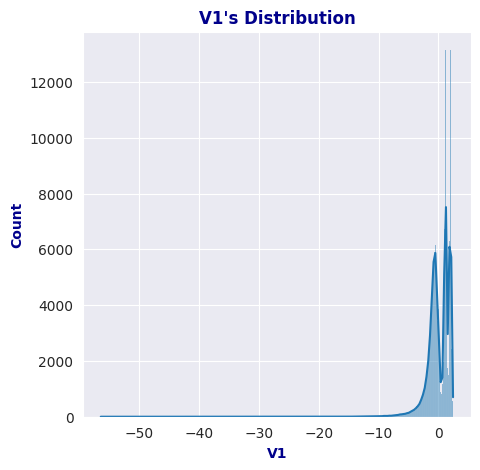

In [ ]:
hist('V1')

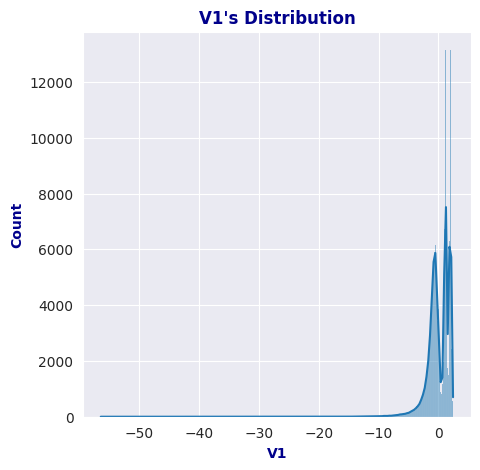

In [ ]:
hist('V1')

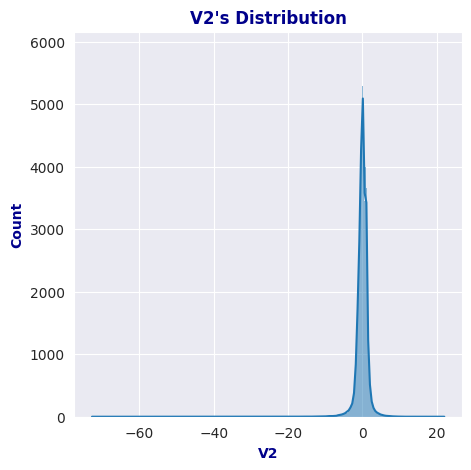

In [ ]:
hist('V2')

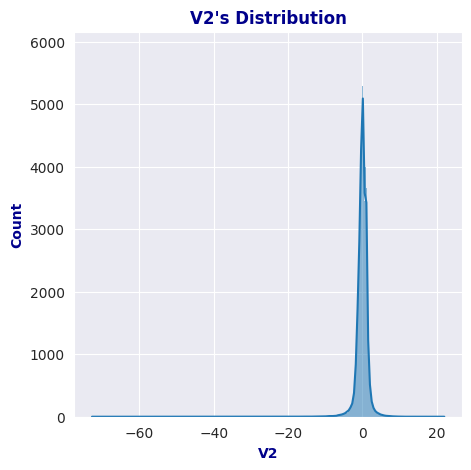

In [ ]:
hist('V2')

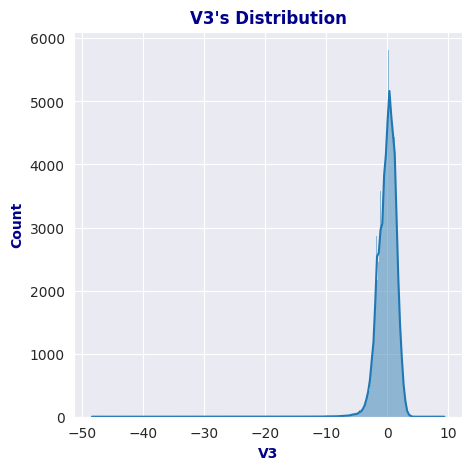

In [ ]:
hist('V3')

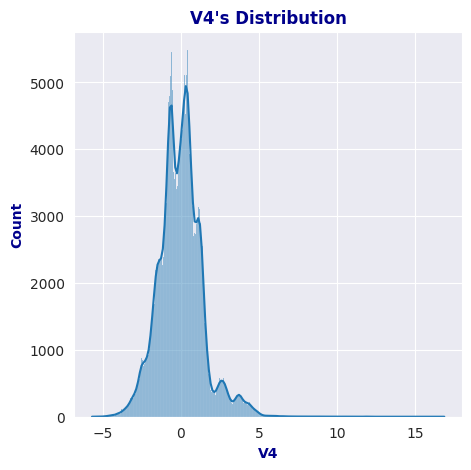

In [ ]:
hist('V4')

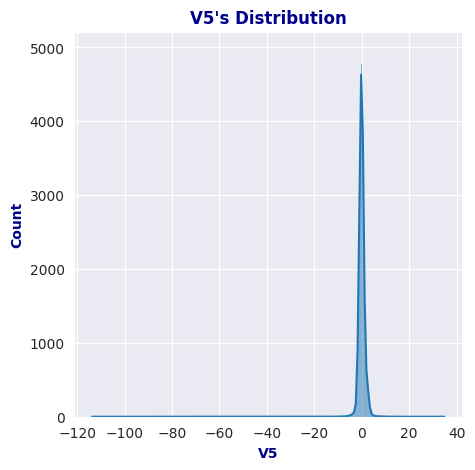

In [ ]:
hist('V5')

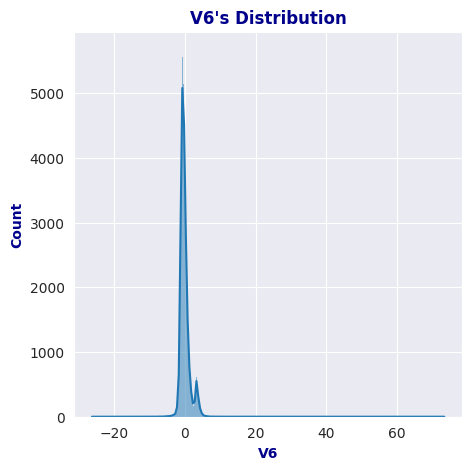

In [ ]:
hist('V6')

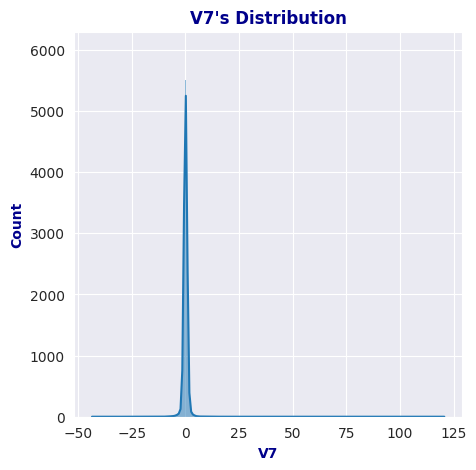

In [ ]:
hist('V7')

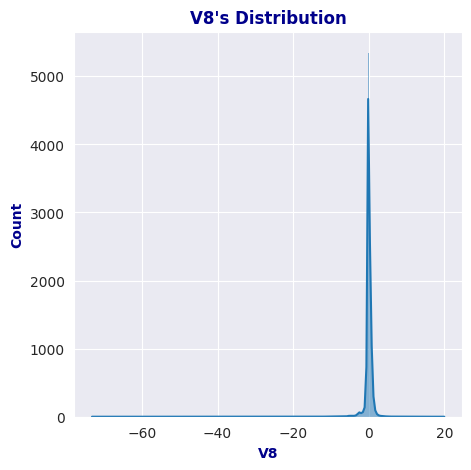

In [ ]:
hist('V8')

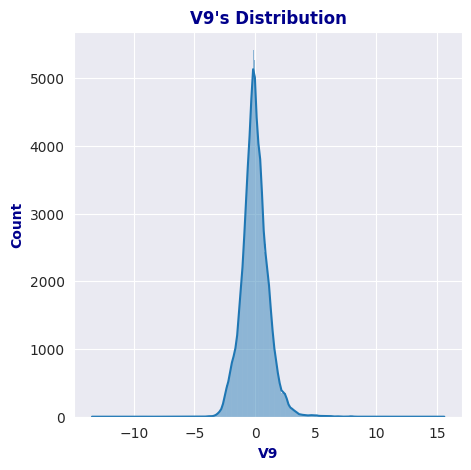

In [ ]:
hist('V9')

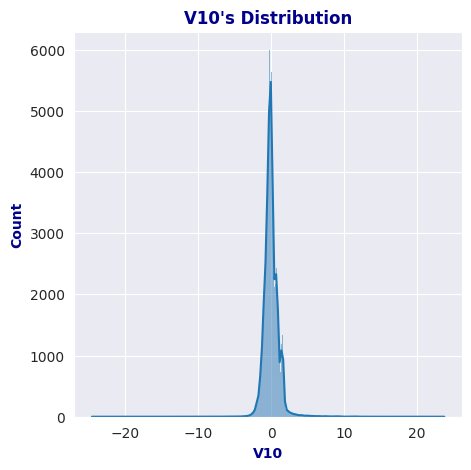

In [ ]:
hist('V10')

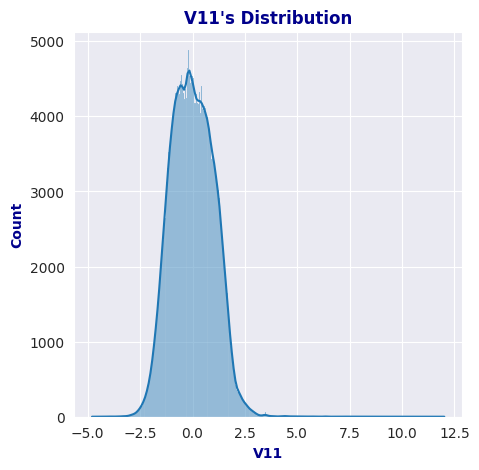

In [ ]:
hist('V11')

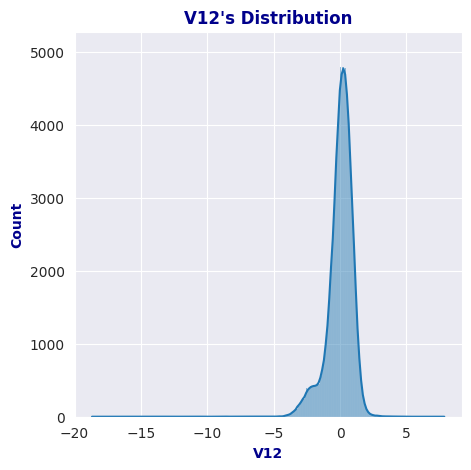

In [ ]:
hist('V12')

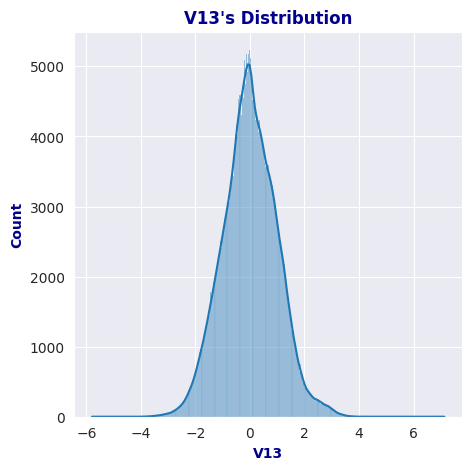

In [ ]:
hist('V13')

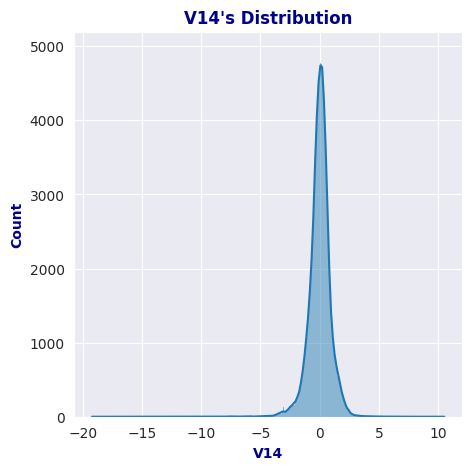

In [ ]:
hist('V14')

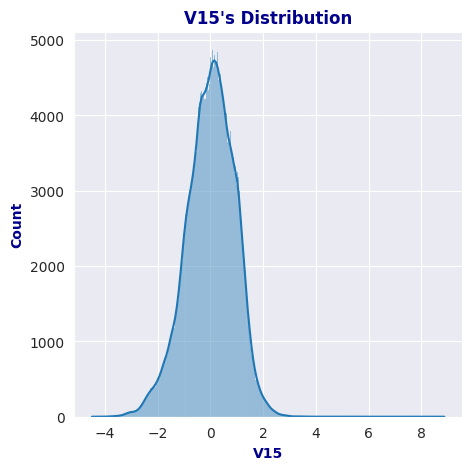

In [ ]:
hist('V15')

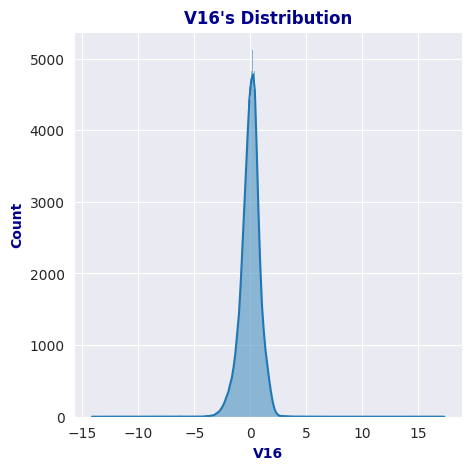

In [ ]:
hist('V16')

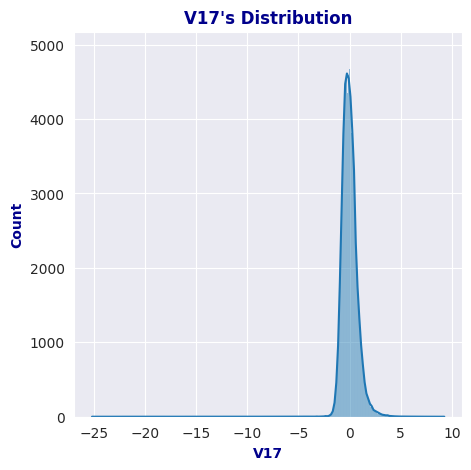

In [ ]:
hist('V17')

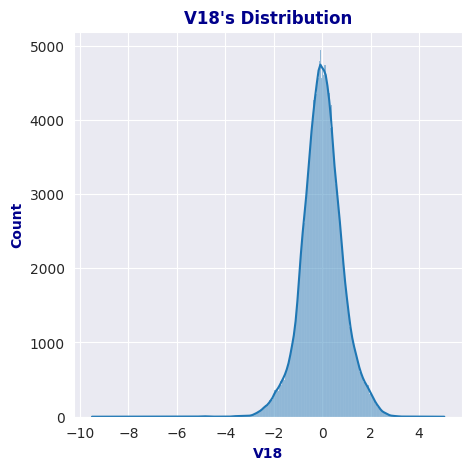

In [ ]:
hist('V18')

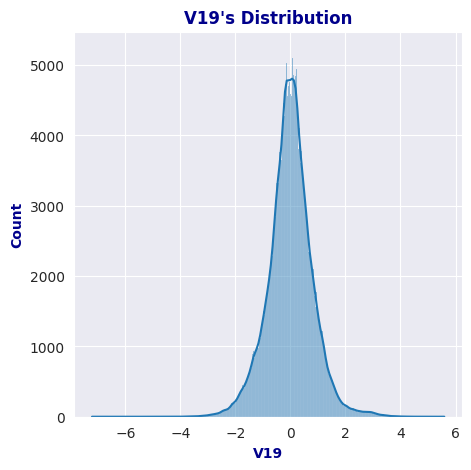

In [ ]:
hist('V19')

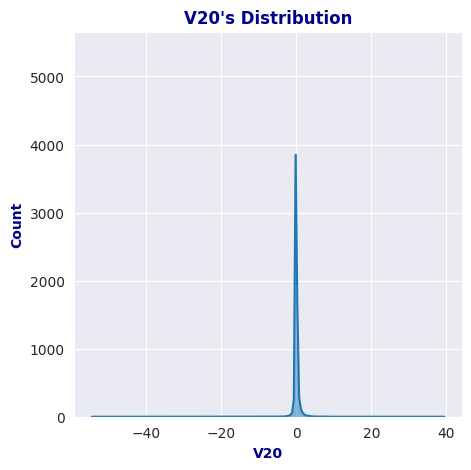

In [ ]:
hist('V20')

In [ ]:
hist('V21')

In [ ]:
hist('V22')

In [ ]:
hist('V23')

In [ ]:
hist('V24')

In [ ]:
hist('V25')

In [ ]:
hist('V26')

In [ ]:
hist('V27')

In [ ]:
hist('V28')

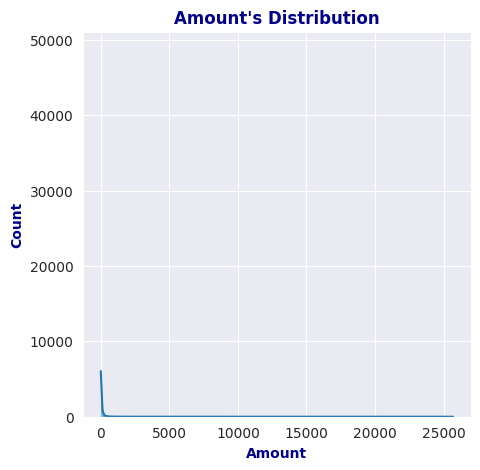

In [ ]:
hist('Amount')

## 3.2 Boxplot <a id=3.2></a>

In [ ]:
def boxplot(col):
    plt.figure(figsize=(6,6))
    sns.set_style("darkgrid")
    sns.boxplot(data=df, y=col, palette='Set2', width=0.5)
    plt.title(f"{col}'s Boxplot", fontdict={'weight':"bold", 'color':'darkblue', 'size':12})
    plt.xlabel(col, fontdict={'weight':"bold", 'color':'darkblue', 'size':10})
    plt.show()

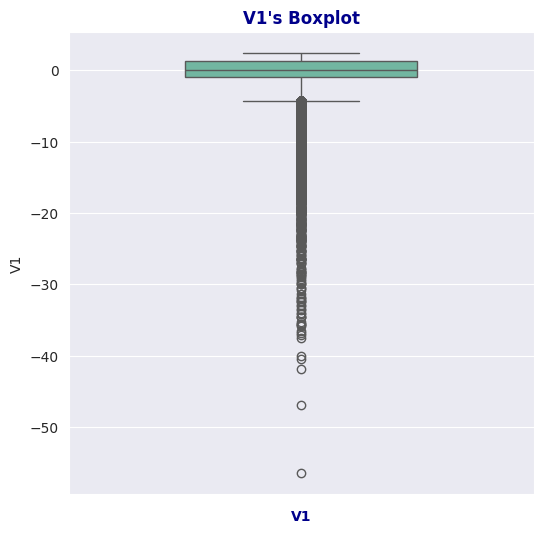

In [ ]:
boxplot('V1')

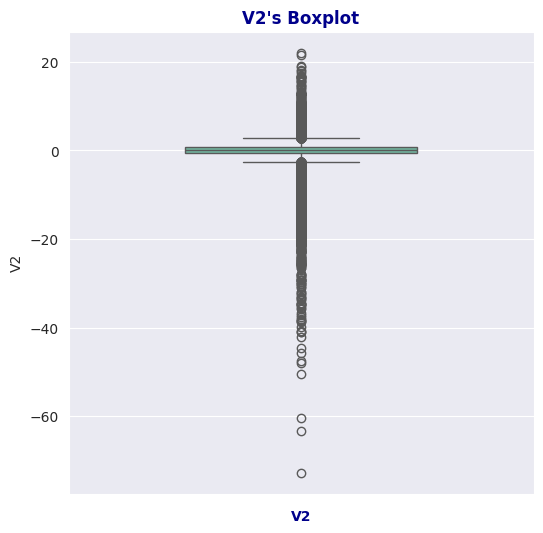

In [ ]:
boxplot('V2')

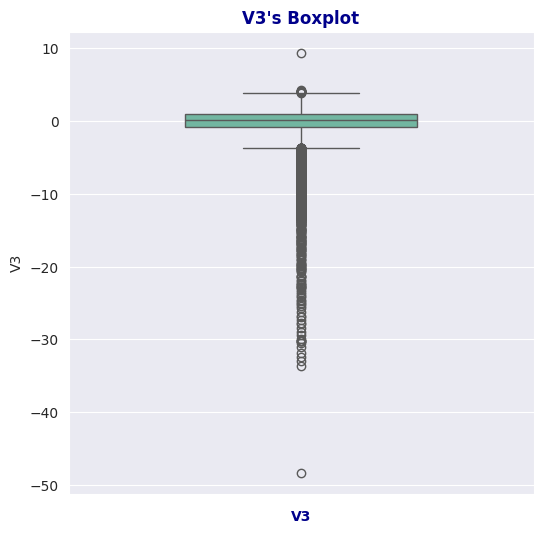

In [ ]:
boxplot('V3')

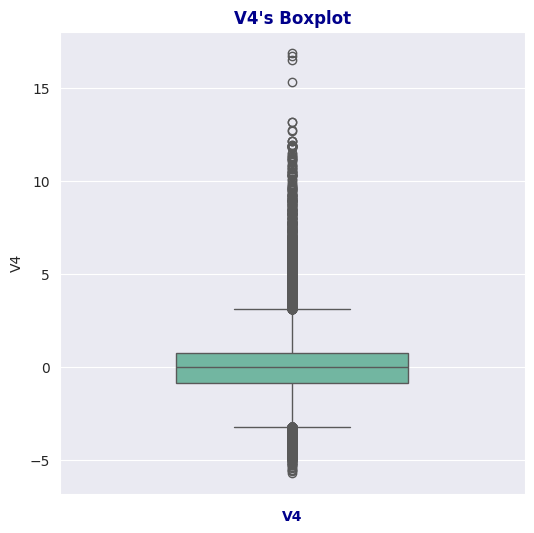

In [ ]:
boxplot('V4')

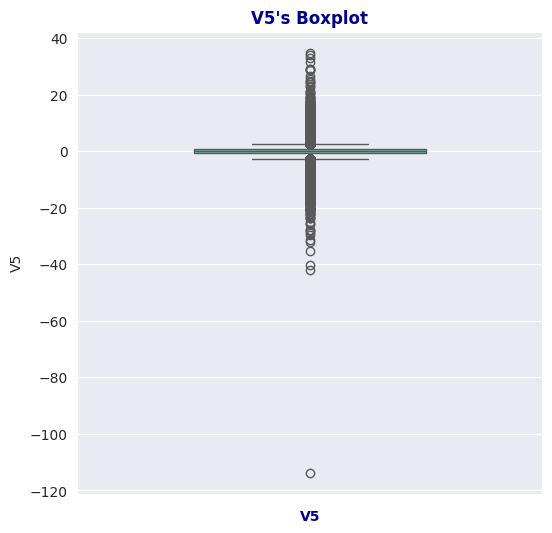

In [ ]:
boxplot('V5')

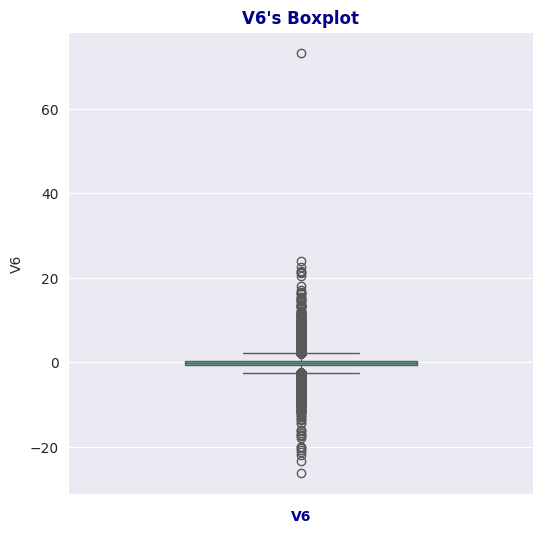

In [ ]:
boxplot('V6')

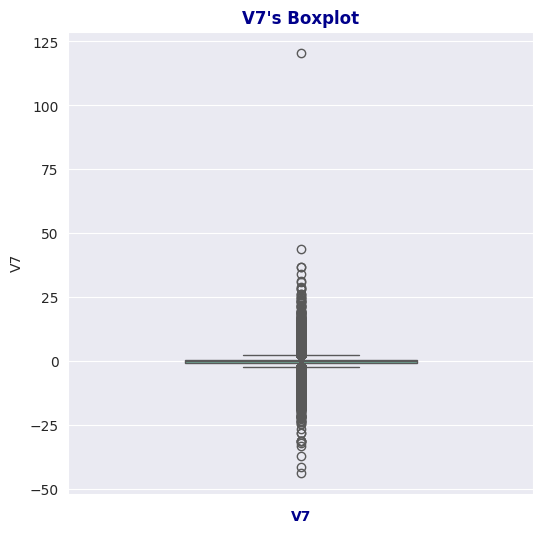

In [ ]:
boxplot('V7')

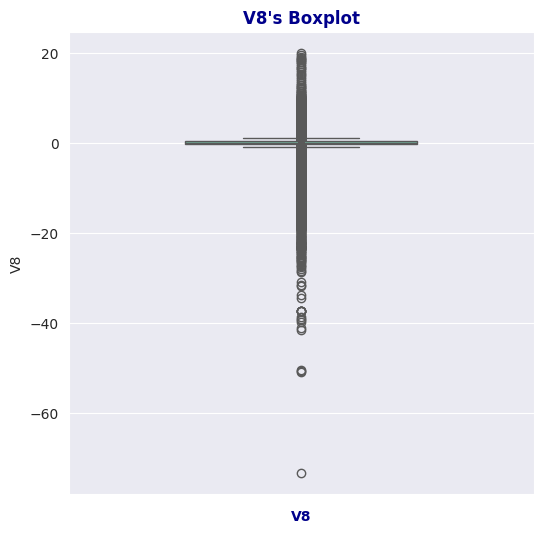

In [ ]:
boxplot('V8')

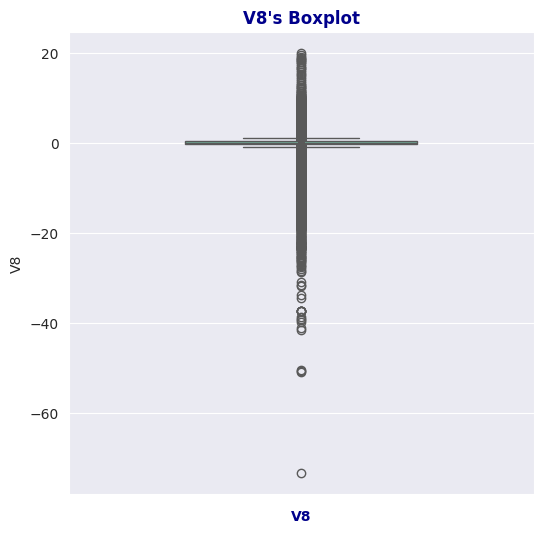

In [ ]:
boxplot('V8')

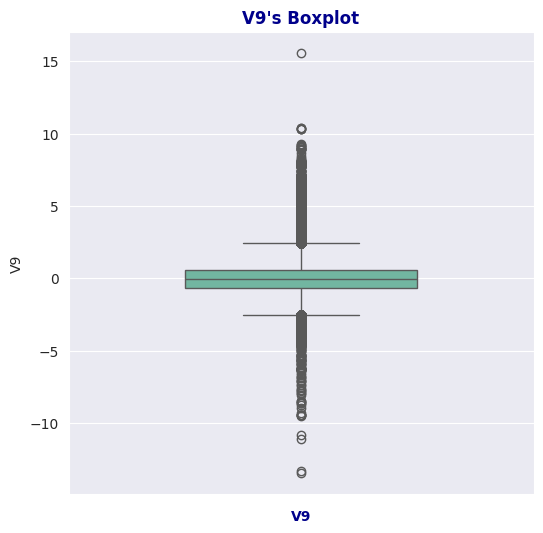

In [ ]:
boxplot('V9')

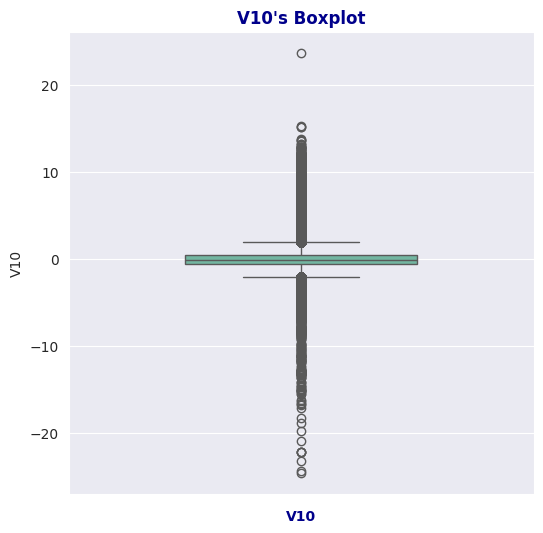

In [ ]:
boxplot('V10')

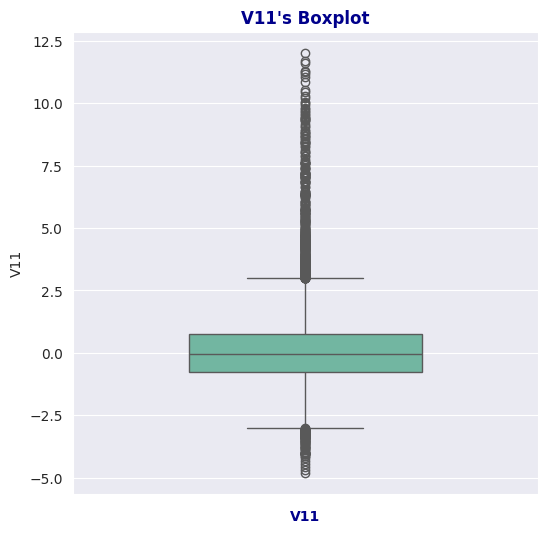

In [ ]:
boxplot('V11')

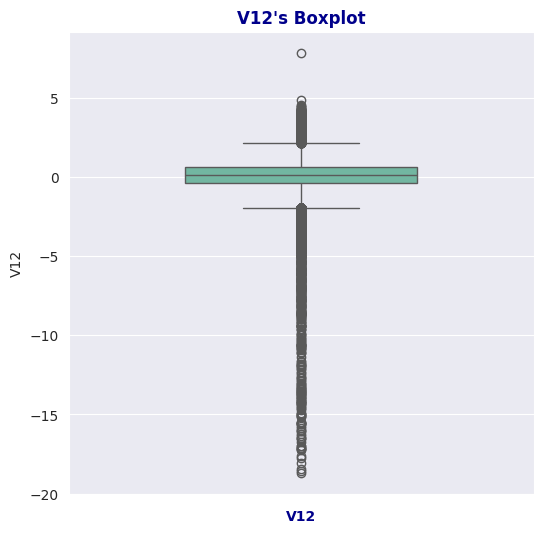

In [ ]:
boxplot('V12')

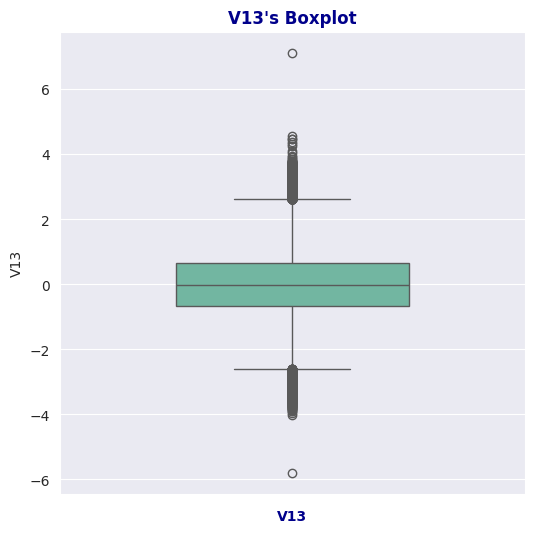

In [ ]:
boxplot('V13')

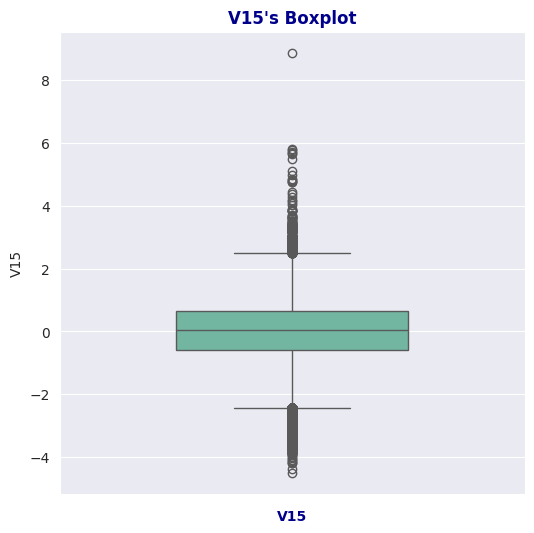

In [ ]:
boxplot('V15')

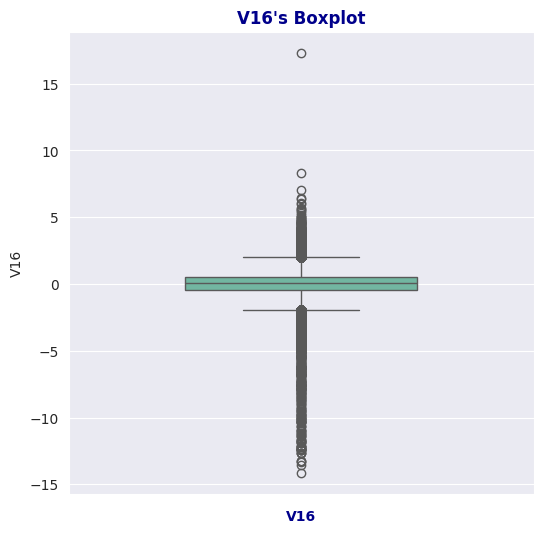

In [ ]:
boxplot('V16')

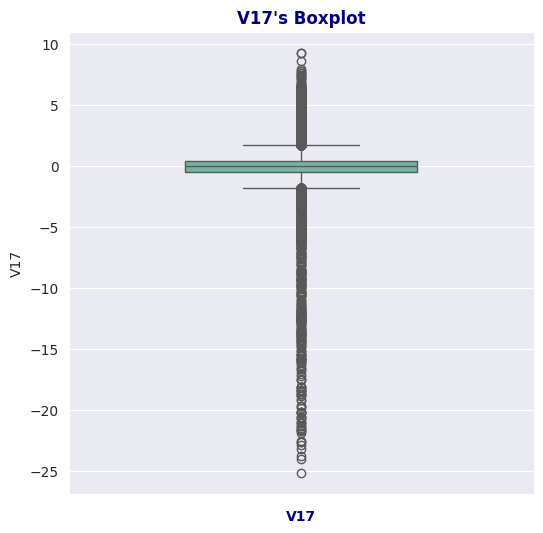

In [ ]:
boxplot('V17')

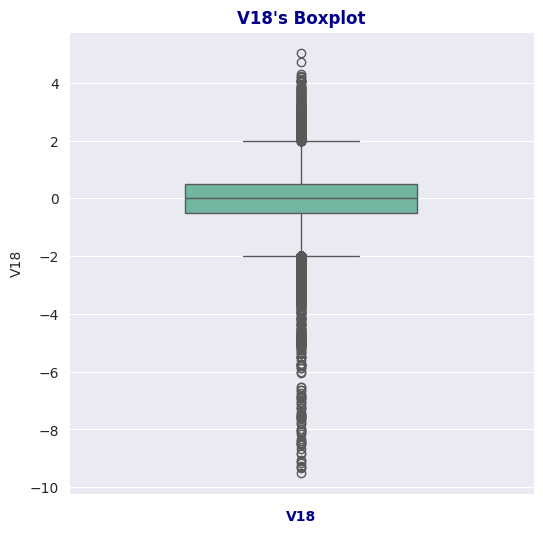

In [ ]:
boxplot('V18')

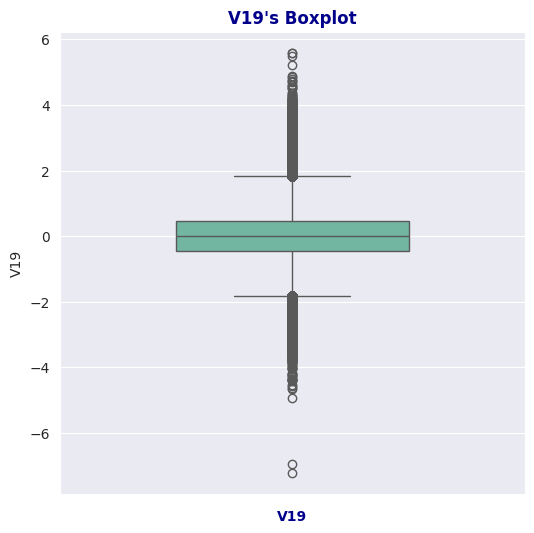

In [ ]:
boxplot('V19')

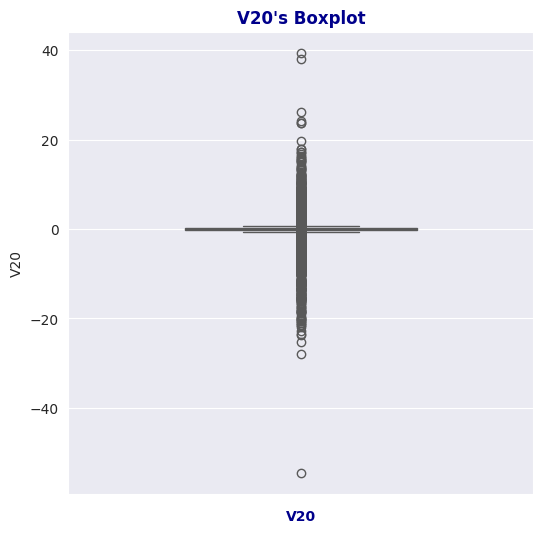

In [ ]:
boxplot('V20')

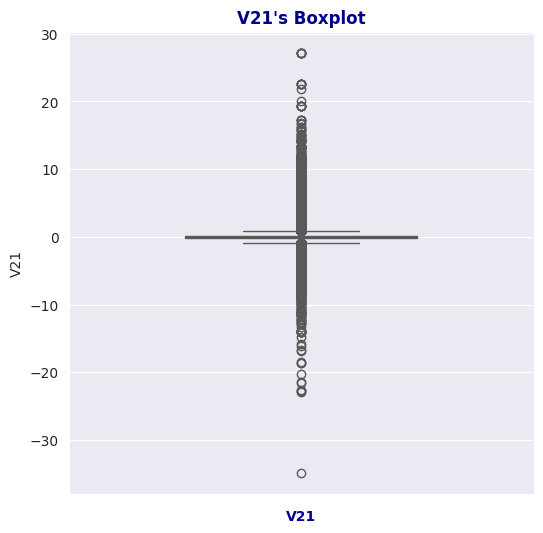

In [ ]:
boxplot('V21')

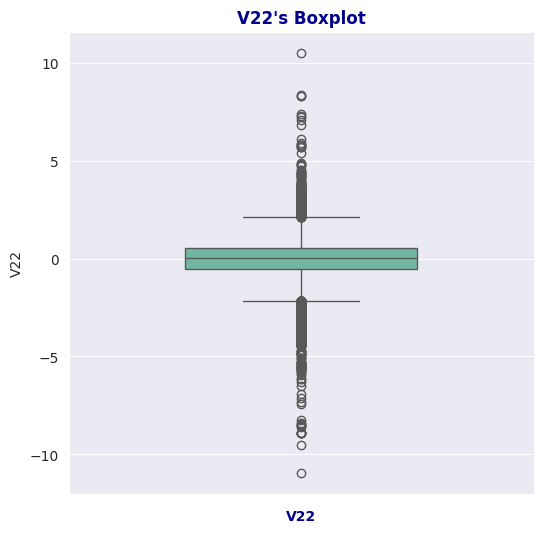

In [ ]:
boxplot('V22')

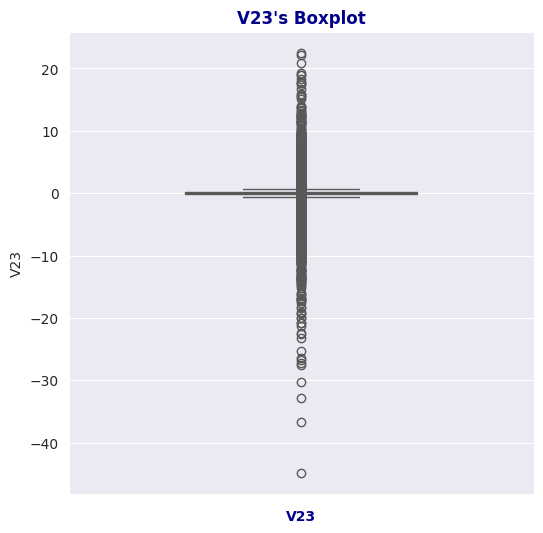

In [ ]:
boxplot('V23')

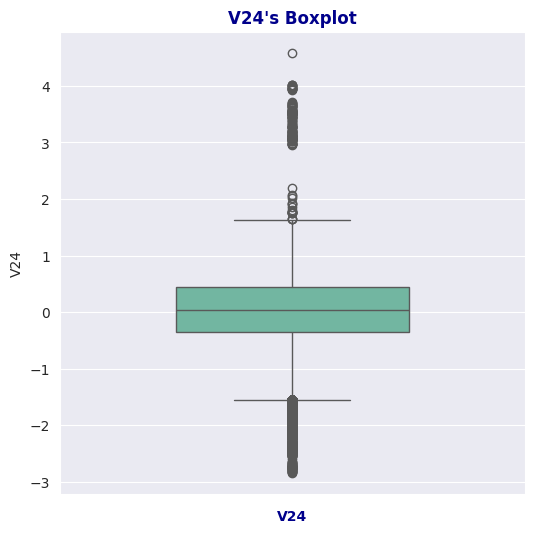

In [ ]:
boxplot('V24')

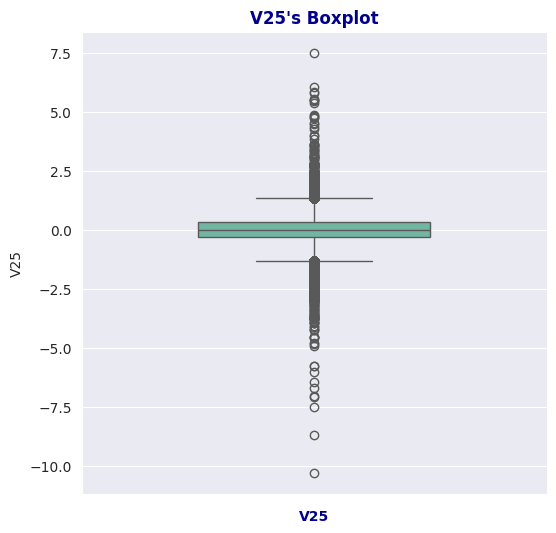

In [ ]:
boxplot('V25')

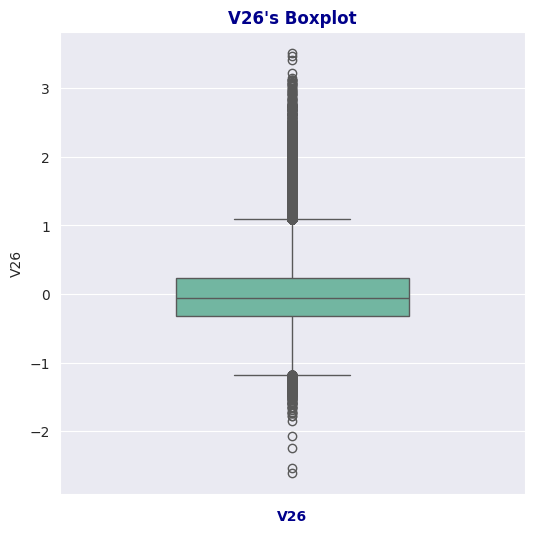

In [ ]:
boxplot('V26')

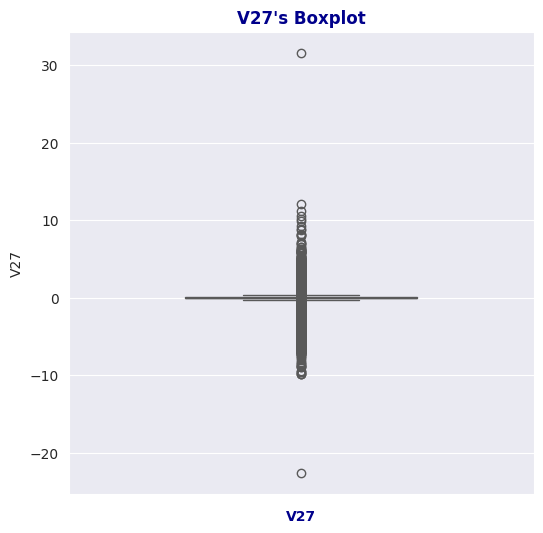

In [ ]:
boxplot('V27')

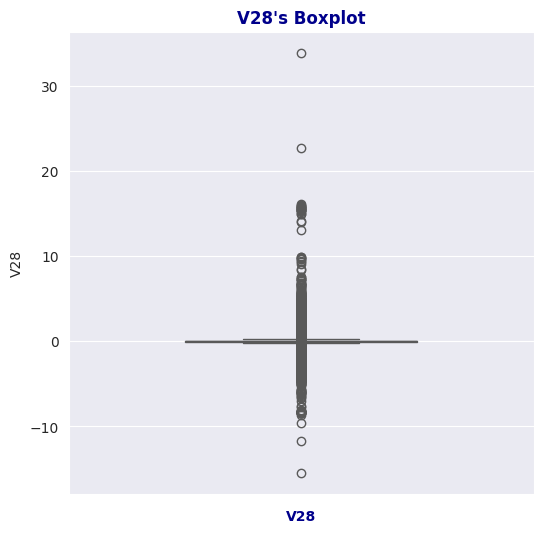

In [ ]:
boxplot('V28')

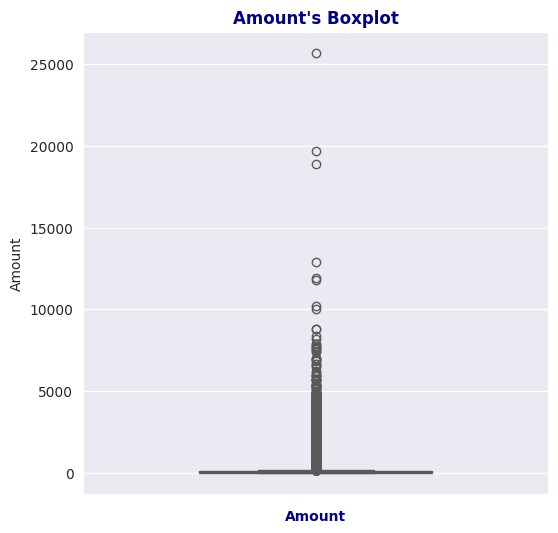

In [ ]:
boxplot('Amount')

## 3.3 Countplot <a id=3.3></a>

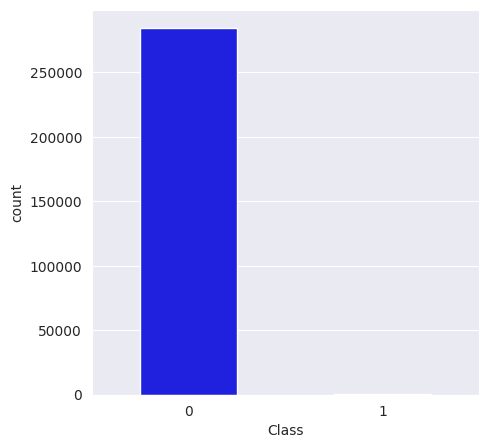

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.countplot(data=df, x='Class', color='blue', width=0.5)
plt.show()

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# 4. Correlation <a id=4></a>

## 4.1 Correlation Bar <a id=4.1></a>

<Axes: title={'center': 'Correlation: Variables Vs Class'}>

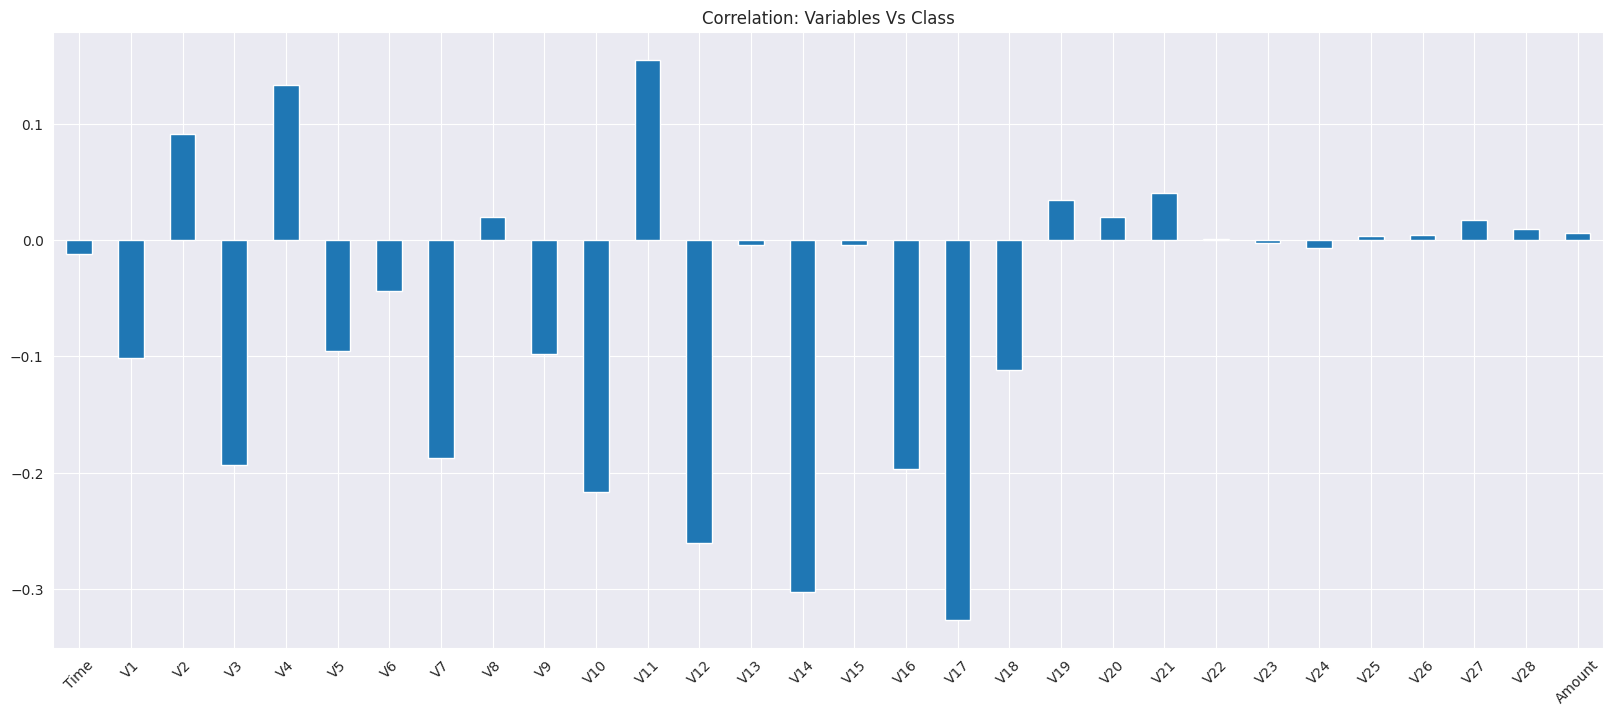

In [ ]:
df2 = df.drop('Class', axis=1)

df2.corrwith(df['Class']).plot.bar(
    figsize=(20, 8),
    grid=True,
    title="Correlation: Variables Vs Class",
    rot=45
)

## 4.2 Correlation Matrix <a id=4.2></a>

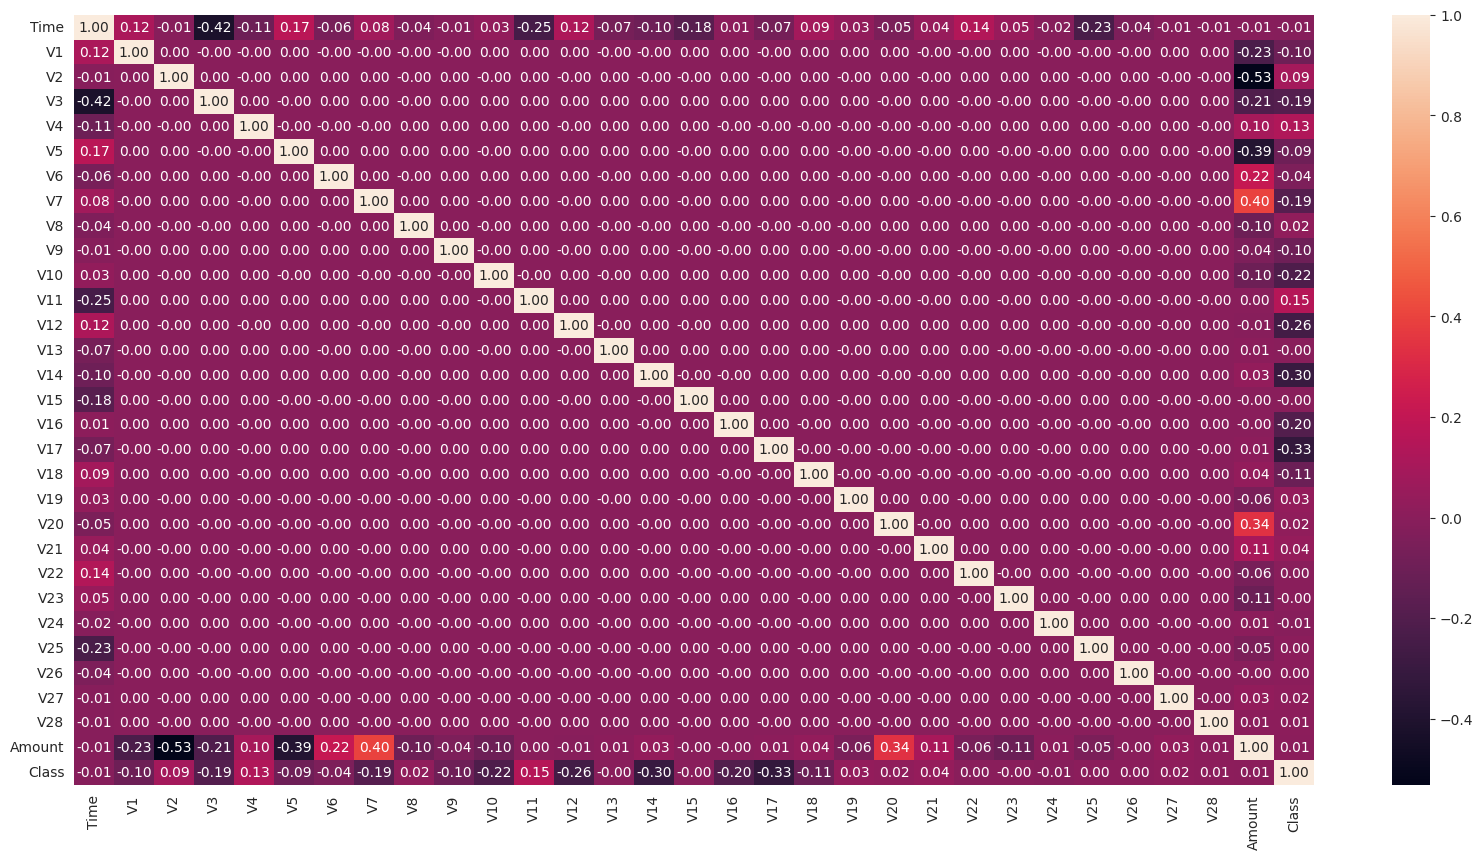

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

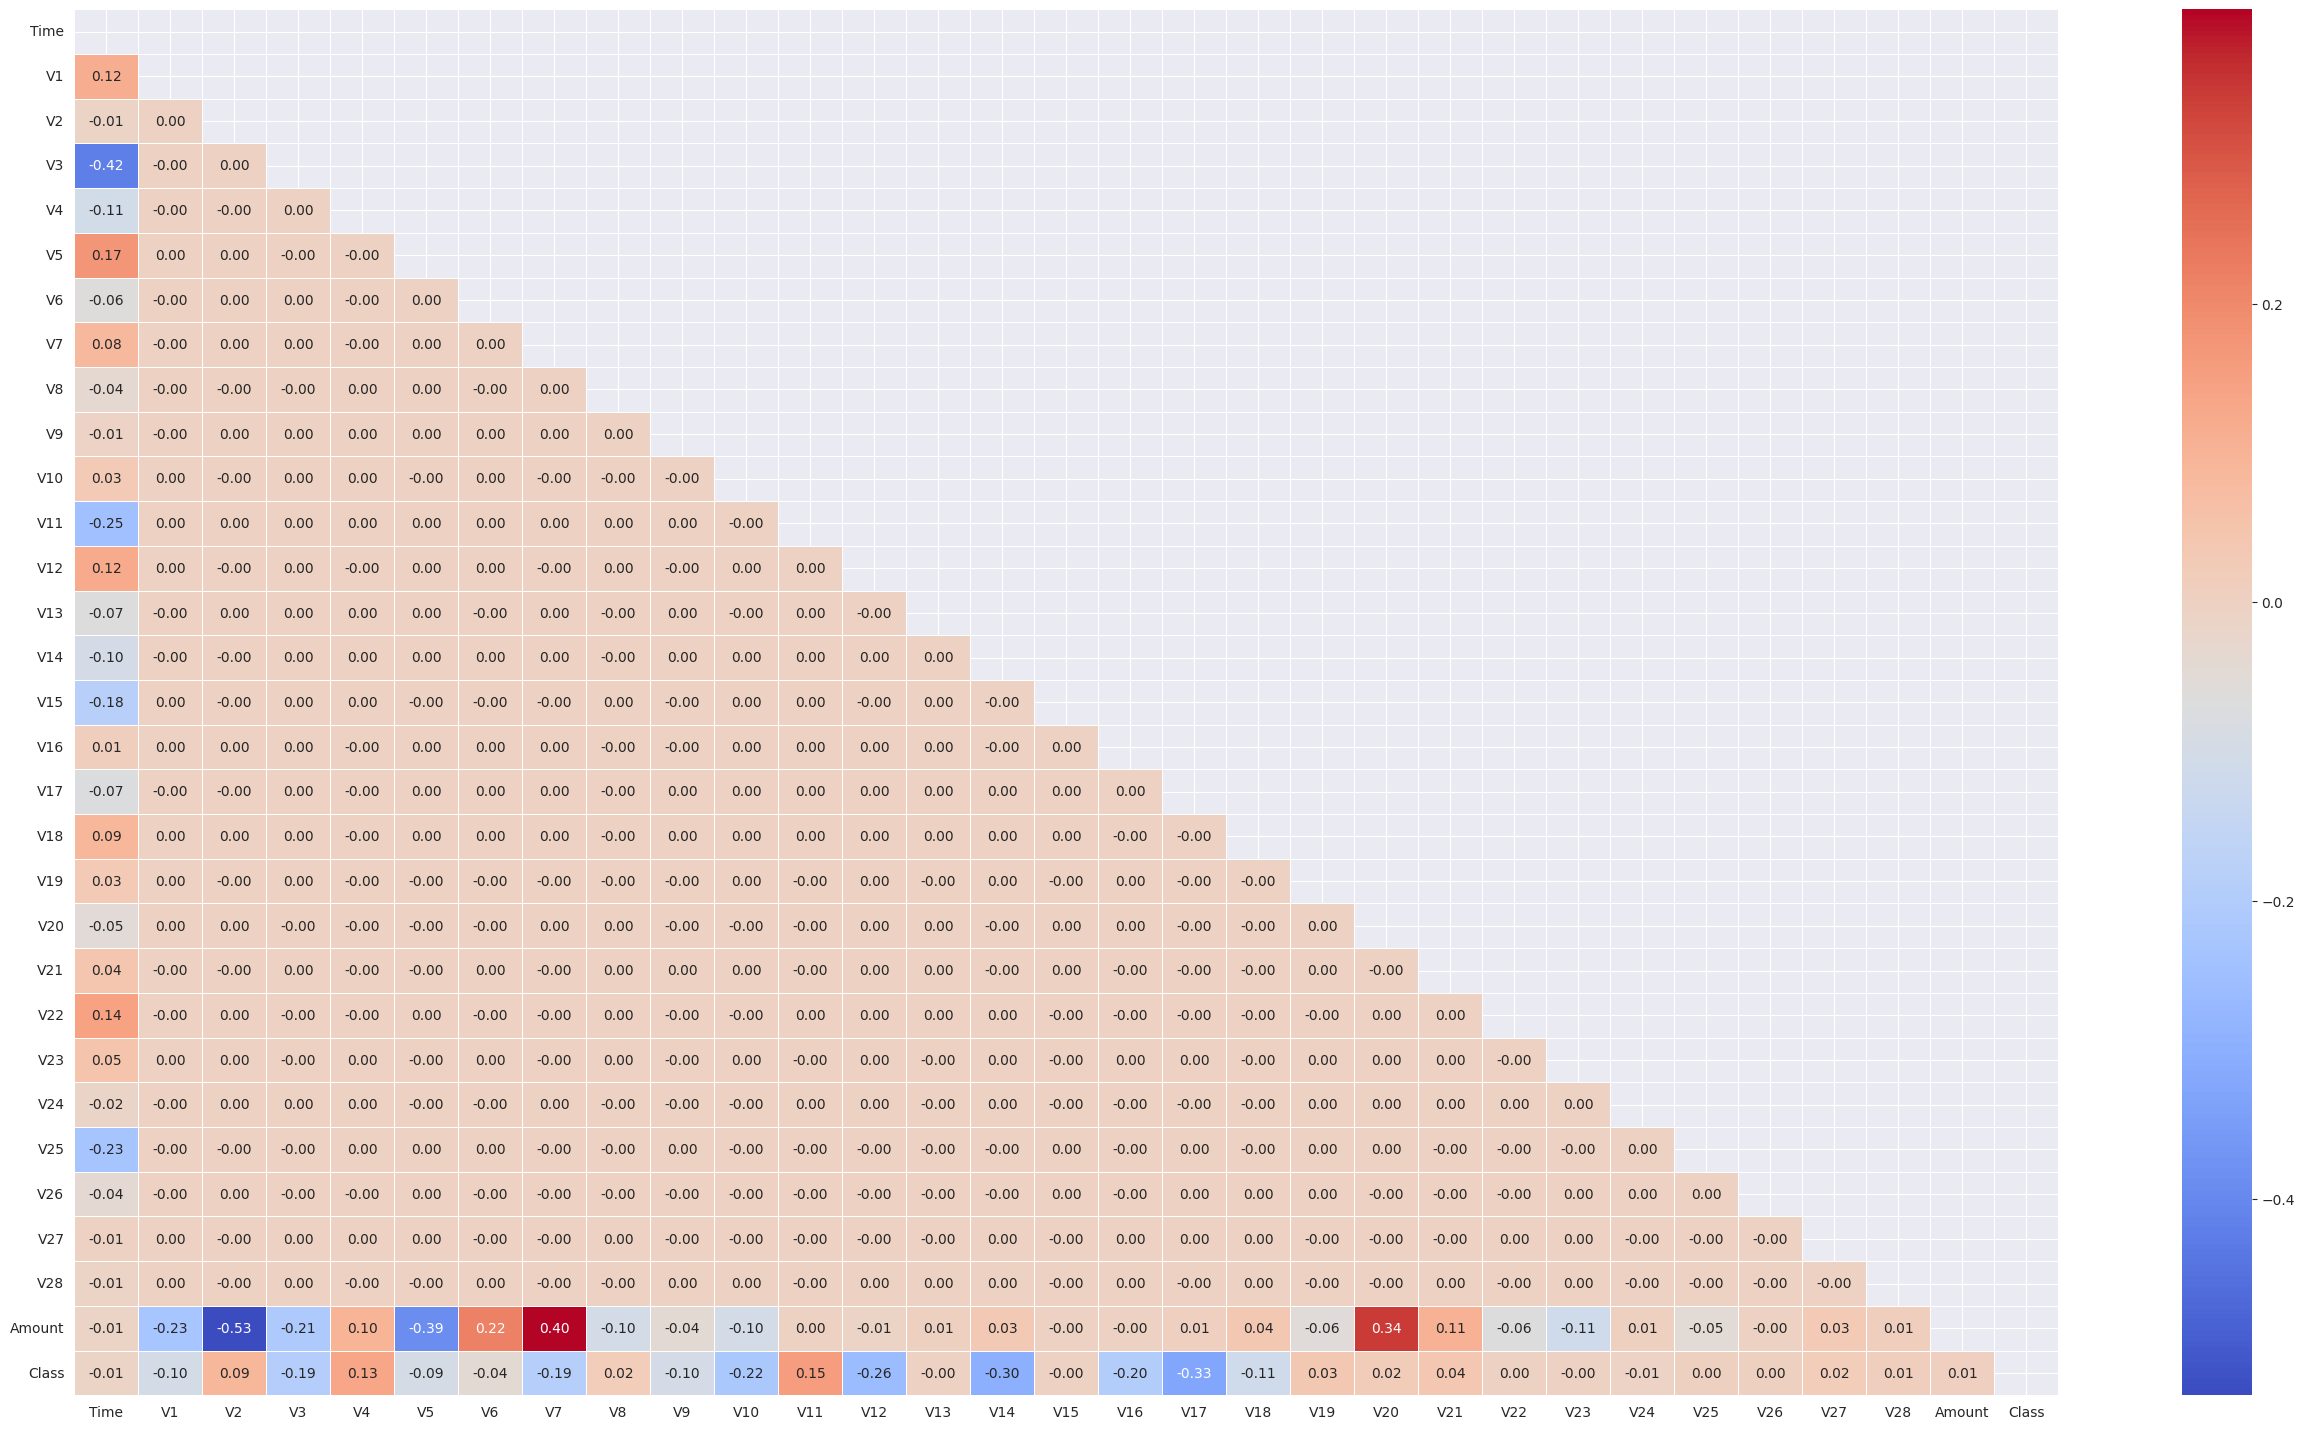

In [ ]:
# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(32,18))
ax = sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', linewidths=0.5, cmap = 'coolwarm')

# 5. Preparing for Modelling <a id=5></a>

## 5.1 Split Depentend/Indepented Variables <a id=5.1></a>

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print("X : ", X.shape)
print("y: ", y.shape)

X :  (284807, 30)
y:  (284807,)


## 5.2 Split Train/Test Sets <a id=5.2></a>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("y_train: ", y_train.shape)

X_train:  (227845, 30)
X_test:  (56962, 30)
y_test:  (56962,)
y_train:  (227845,)


## 5.3 Feature Scaling <a id=5.3></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Machine Learning Models <a id=6></a>

In [ ]:
# to records model's performance
results = []

## 6.1 LogisticRegression <a id=6.1></a>

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression instance
classifier_lr = LogisticRegression()
# training the model
classifier_lr.fit(X_train, y_train)
# prediction on test set
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
# Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)


lr_results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
lr_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.998999,0.72449,0.70297,0.713568


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_lr,
                             X = X_train,
                             y = y_train,
                             cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 99.89 %
Standard Deviation is 0.02 %


## 6.2 Random Forest <a id=6.2></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instance of random forest
classifier_rf = RandomForestClassifier(random_state=0)
# fitting rf model
classifier_rf.fit(X_train, y_train)
# prediction on test set
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
# Check Model's Performance
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

rf_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
                         columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([rf_results, lr_results])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999491,0.918605,0.782178,0.844920
0,Logistic Regression,0.998999,0.724490,0.702970,0.713568


In [ ]:
# Cross Validation
accuracies = cross_val_score(estimator=classifier_rf,
                             X = X_train,
                             y = y_train,
                             cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 99.95 %
Standard Deviation is 0.01 %


## 6.3 XGBoost Classifier <a id=6.3></a>

In [ ]:
from xgboost import XGBClassifier

# instance of xgboost
classifier_xgb = XGBClassifier(random_state=0)
# fitting xgb model
classifier_xgb.fit(X_train, y_train)
# prediction on test set
y_pred_xgb = classifier_xgb.predict(X_test)

In [ ]:
# Check Model's Performance
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

xgb_results = pd.DataFrame([['XGB Classifier', acc, prec, rec, f1]],
                         columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([rf_results, lr_results, xgb_results])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999491,0.918605,0.782178,0.844920
0,Logistic Regression,0.998999,0.724490,0.702970,0.713568
0,XGB Classifier,0.999544,0.921348,0.811881,0.863158


In [ ]:
# Cross Validation
accuracies = cross_val_score(estimator = classifier_xgb,
                             X = X_train,
                             y = y_train,
                             cv = 10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

## 6.4 Hyperparameter Search for XGBoost Model <a id=6.4></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_tuned = XGBClassifier(random_state=0)

params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
    }

ramdom_search = RandomizedSearchCV(estimator = xgb_tuned,
                                   param_distributions = params,
                                   n_jobs = -1,
                                   n_iter = 5,
                                   scoring = 'roc_auc',
                                   )

ramdom_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc')

In [ ]:
best_score = ramdom_search.best_score_
best_params = ramdom_search.best_params_
best_estimator = ramdom_search.best_estimator_

print(f"Best Score By XGB: {best_score}\n")
print(f"Best Parameters for XGB: {best_params}\n")
print(f"Best Estimator By XGB: {best_estimator}")

Best Score By XGB: 0.9803272852301589

Best Parameters for XGB: {'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.5}

Best Estimator By XGB: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


## 6.5 XGBoost Tuned <a id=6.5></a>

In [ ]:
classifier = best_estimator
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Check Model's Performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

clf_results = pd.DataFrame([['XGBoost Tuned', acc, prec, rec, f1]],
                         columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([rf_results, lr_results, xgb_results, clf_results])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999491,0.918605,0.782178,0.844920
0,Logistic Regression,0.998999,0.724490,0.702970,0.713568
0,XGB Classifier,0.999544,0.921348,0.811881,0.863158
0,XGBoost Tuned,0.999544,0.912088,0.821782,0.864583
